<a href="https://colab.research.google.com/github/ManuelGDS/Simulacion-1/blob/main/Empresa_TIBASA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Gonzalezd de Santiago José Manuel

# Ejercicio 1

1. La empresa TIBASA (fabricante de tinas de baño) tiene asignado un camión especial
para el transporte de tinas terminadas. Dicho camión transporta diariamente 5 tinas.
El peso de cada tina sigue la siguiente distribución de probabilidad:
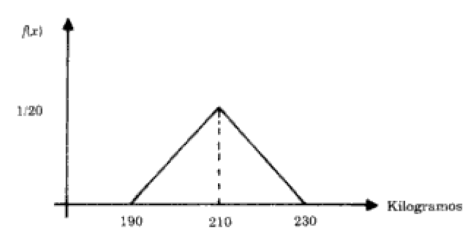



Si la capacidad del camión es de una tonelada, ¿cuál es la probabilidad de que el peso
de las tinas exceda la capacidad del camión?

# a) Resolver analíticamente.

$X_i$~$Tri(a,b,c)$

Tenemos la condicion
$x_1+x_2+x_3+x_4+x_5>1000$

Primero determinamos la funcion para el trozo de $[190, 210]$

$m=\frac{y_2-y_1}{x_2-x_1}$

$m_1=\frac{\frac{1}{20}-0}{210-190}=\frac{1}{400}$

y ahora utilizando la formula de las rectas

$y-y_1=m(x_1)$

sustituyendo

$y-0=\frac{10}{400}(x-190)--> y=\frac{1}{400}(x-190)$

Ahora determinamos la funcion para el intervalo $[210, 230]$

$m_2=\frac{0-\frac{1}{20}}{230-210}=-\frac{1}{400}$

y ahora deterinamos la recta

$y=-\frac{1}{400}(x-210)$

Y nuestra función queda de la siguiente forma

$f(x) = \begin{cases}
\frac{1}{400}(x - 190) & \text{si } 190 \leq x \leq 210 \\
-\frac{1}{400}(x - 210) & \text{si } 219 \leq x \leq 230
\end{cases}$




Ahora el calculo de $\mu$ y $\sigma$

$\mu=E(x)=\int_{x}^{210}xf(x)dx=210$

$sigma^2=Var(x)=\int_{190}^{230}(x-200)^2f(x)dx=\frac{200}{3}$

Que calcular

$P(x_1+x_2+x_3+x_4+x_5)$

Usamos el teorema central del limite

(valor para n>=4)

$\lim_{x \to \infty} P(\frac{x_1+x_2+x_3+x_4+x_4}{\sigma\sqrt{n}}<x)=Q(x)$

Escribimos

$\frac{x_1+x_2+x_3+x_4+x_5-5\cdot210}{\sqrt{\frac{200}{3}}\cdot\sqrt{5}}<\frac{1000-5\cdot 210}{\sqrt{\frac{200}{3}}\cdot \sqrt{5}}$

Luego,

$\frac{x_1+x_2+x_3+x_4+x_5}{\sqrt{\frac{210}{3}\cdot5}}<-2.73$


Y sustituimos en el teorema

$P(Z<-2.73)=Q(-2.73)$

$P(x_1+x_2+x_3+x_4+x_4>1000)=1-Q(-2.73)$

$=0.997=99.7\%$

# b) Resolver por simulación

Calculamos $F(x)$

$f(x)>=0$


$F(x)=\int_{-\infty}^{x}f(s)ds$ y como sigue una distribucion triangular podemos usar la definicion de Funcion de distribución.

$$
F(x)=
\begin{cases}
0 & \text{para } x \leq a, \\
\frac{(x-a)^2}{(b-a)(c-a)} & \text{para } a < x \leq c, \\
1 - \frac{(b-x)^2}{(b-a)(b-c)} & \text{para } c < x < b, \\
1 & \text{para } b \leq x.
\end{cases}
$$

Entonces tenemos


$$
F(x)=
\begin{cases}
\frac{(x-190)^2}{800} & \text{si } 190 \leq x <210, \\
1 - \frac{(230-x)^2}{800} & \text{si } 210 \leq x \leq 230,
\end{cases}
$$

Resolvemos $F(x)=R$

$x=20\sqrt{2u}+190$ si $0\leq u\leq \frac{1}{2}$

$x=-20\sqrt{2(1-u)}+230$

In [ ]:
import random as rnd
import matplotlib.pyplot as plt
import numpy as np
import math

In [ ]:
def sim_tinas(n):
  lista = []
  for i in range(n):
    u = rnd.random()
    if u<.5:
      x = 20 * math.sqrt(2*u)+190
    else:
      x = -20 * math.sqrt(2*(1-u))+230
    lista.append(x)
  return lista

In [ ]:
G = sim_tinas(100000)

In [ ]:
media = np.mean(G)

In [ ]:
varianza = np.var(G)

(array([ 2145.,  6074., 10187., 14127., 17996., 17813., 13795.,  9751.,
         6078.,  2034.]),
 array([190.13798539, 194.12025097, 198.10251654, 202.08478211,
        206.06704768, 210.04931325, 214.03157882, 218.0138444 ,
        221.99610997, 225.97837554, 229.96064111]),
 <BarContainer object of 10 artists>)

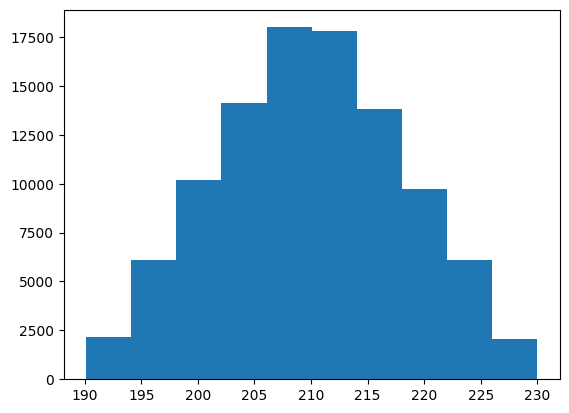

In [ ]:
plt.hist(G)

In [ ]:
def cdf(G):
  n = len(G)
  x = np.sort(G)
  y = np.arange(0, n)/n
  return x, y

In [ ]:
X, Y = cdf(G)

In [ ]:
media = (G)

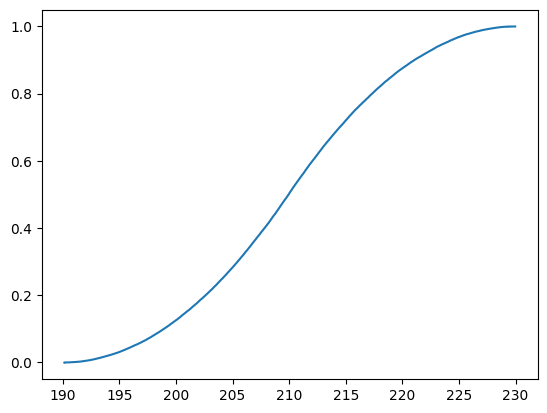

In [ ]:
plt.step(X,Y)

In [ ]:
def sim_tinas(n):
  lista = []
  contador = 0
  for k in range(n):

    lista_1 = []
    for i in range(5):
      u = rnd.triangular(190,230,210)
      lista_1.append(u)
    cantidad = sum(lista_1)
    if cantidad > 1000:
      contador += 1
      prob = contador/n
      lista.append(prob)
  return lista

In [ ]:
def sim_tina(N):
  lista = []
  a = 190
  b = 320
  c = 210
  contador = 0
  for i in range(N):
    u_1 = rnd.triangular(a,b,c)
    u_2 = rnd.triangular(a,b,c)
    u_3 = rnd.triangular(a,b,c)
    u_4 = rnd.triangular(a,b,c)
    u_5 = rnd.triangular(a,b,c)
    if (u_1+u_2+u_3+u_4+u_5)>1000:
      contador = contador +1
      prob=contador/N
      lista.append(prob)
  return lista



# Ejercicio 2

Analice la conveniencia de adquirir un nuevo camión. Para tal propósito, suponga que
cada vez que la capacidad del camión es excedida una tina es enviada a través de otra
compañía a un costo de $\$200$. También suponga que el costo promedio anual de un
nuevo camión es de $\$60, 000$. Si se trabaja 5 días a la semana y 52 semanas al año,
¿cuál de las dos alternativas mencionadas es la más atractiva?

# a) Resolver analíticamente.

Tenemos 5 dias y 52 semanas

5 dias $\cdot$ 52 semanas = 260 dias

260 dias $-> 100\%$

x $-> 99.7\%$

$x=\frac{260\cdot99.7}{100}=259$ días

Costo $=259\cdot \$200=\$51800$

#b) Resolver por simulación.